## Configuração de Ambiente

In [1]:
from config import result_index

results_folder = f"results_{result_index}"

In [2]:
%pip install --upgrade matplotlib bertopic plotly datamapplot
%pip install openai
%pip install transformers sympy
%pip install wordcloud
%pip install -u kaleido

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\vmart\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\vmart\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\vmart\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\vmart\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Users\vmart\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\Users\vmart\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\Users\vmart\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\Users\vmart\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] [-e] <local project path> ...
  C:\Users\vmart\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] <archive url/path> ...

no such option: -u


In [3]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

from wordcloud import WordCloud

## Importação de Dados

In [4]:
from utils.save_models_and_variables import load_model, load_variable

topic_model = load_model(f'{results_folder}/bertopic')
topics = load_variable(f'{results_folder}/topics_bertopic')
probs = load_variable(f'{results_folder}/probs_bertopic')

C:\Users\vmart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loaded model: results_2025_06_10/bertopic.pkl
Loaded variable: results_2025_06_10/topics_bertopic.pkl
Loaded variable: results_2025_06_10/probs_bertopic.pkl


In [5]:
import numpy as np

# Obter os textos representativos de cada tópico
topic_info = topic_model.get_topic_info()
top_topics = topic_info['Topic'].tolist()

summaries = {}
for topic in top_topics:
    if topic == -1:
        continue  # Ignorar outliers
    topic_docs = topic_model.get_representative_docs(topic)
    summary = " ".join(topic_docs[:3])  # Concatenar os 3 textos mais relevantes do tópico
    summaries[topic] = summary

# Exibir os resumos
for topic, summary in summaries.items():
    print(f"Tópico {topic}: {summary}\n")


Tópico 0: atitudes importantes para um relacionamento qual sua opinião #rafaelaires #antiotario #redpillbrasil pare de ser feito de otário manual antiotário evitar manipulações e jogos emocionais se posicionar com inteligência no relacionamentos tornese melhor versão de si mesmo adquira seu agora hotmartgeracaoantiotario livro que te ensina se impor evitar ciladas e nunca mais ser feito de trouxa atitudes importantes para um relacionamento qual sua opinião #rafaelaires #antiotario #redpillbrasil pare de ser feito de otário manual antiotário evitar manipulações e jogos emocionais se posicionar com inteligência no relacionamentos tornese melhor versão de si mesmo adquira seu agora hotmartgeracaoantiotario livro que te ensina se impor evitar ciladas e nunca mais ser feito de trouxa paz que homem mais quer casamento qual sua opinião #rafaelaires #antiotario #redpillbrasil pare de ser feito de otário manual antiotário evitar manipulações e jogos emocionais se posicionar com inteligência no 

In [6]:
# Obter as palavras-chave dos tópicos, incluindo outliers (-1)
topic_info = topic_model.get_topics()

# Exibir as palavras-chave dos tópicos
for topic, words in topic_info.items():
    keywords = ", ".join([word[0] for word in words[:10]])  # Pegar apenas as palavras
    if topic == -1:
        print(f"Tópico {topic} (Outliers): {keywords}")
    else:
        print(f"Tópico {topic}: {keywords}")


Tópico 0: evitar, feito, antiotário, ser, redpillbrasil, ciladas, adquira, trouxa, rafaelaires, antiotario
Tópico 1: memes, vindo, humor, canal, não, bem, inscrever, like, ative, video
Tópico 2: capítulo, como, homem, ele, emocional, obra, red, pill, feminina, que
Tópico 3: http, redcast, master, junior, instagram, host, veste, submundointelectual, redcastoficial, paykiwifycombrohey
Tópico 4: http, conselho, projetoconselhosubstackcom, comercial, recomendo, gmailcom, plaiterpontescomterapiacupomconselho, hábitos, wwwaltoconselhocom, growth


In [7]:
import pandas as pd

df = pd.read_csv(f'{results_folder}/topic_data.csv')

In [9]:
sentences = df['text']

## Visualizações

In [10]:
from utils.save_models_and_variables import load_variable

topic_names_dict = load_variable(f'{results_folder}/topics_dict')

Loaded variable: results_2025_06_10/topics_dict.pkl


In [11]:
# Gerar a matriz TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(sentences)

num_topics = len(topic_names_dict)

kmeans = KMeans(n_clusters=num_topics, random_state=42)
kmeans.fit(tfidf_matrix)

# Função para gerar nuvens de palavras
def generate_wordcloud(tfidf_matrix, topic_labels, topic_number, topic_name):
    mask = topic_labels == topic_number
    topic_data = tfidf_matrix[mask]

    feature_names = vectorizer.get_feature_names_out()
    word_freq = np.asarray(topic_data.sum(axis=0)).flatten()

    # Selecionar as 30 palavras com maior pontuação TF-IDF
    sorted_indices = word_freq.argsort()[::-1]  # Ordenar as palavras pela frequência (decrescente)
    top_30_indices = sorted_indices[:30]  # Pegar as 30 palavras mais frequentes
    
    # Criar o dicionário com as 30 palavras mais populares
    word_dict = {feature_names[i]: word_freq[i] for i in top_30_indices}

    # Gerar a nuvem de palavras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_dict)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Tópico {topic_number}: {topic_name}")
    
    # Salvar imagem como PNG
    print(topic_name)
    sanitized_title = topic_name.replace(" ", "_").replace("/", "_")  # Evitar problemas no nome do arquivo
    plt.savefig(f"{results_folder}/{topic_number}_wordcloud_{sanitized_title}.png")
    plt.show()

# Gerar nuvens de palavras para cada tópico
for topic_number, topic_name in topic_names_dict.values:
    generate_wordcloud(tfidf_matrix, kmeans.labels_, topic_number, topic_name)

  File "C:\Users\vmart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


TypeError: 'builtin_function_or_method' object is not iterable

In [12]:
barchart = topic_model.visualize_barchart()
barchart

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': '#D55E00'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.059073214635693955, 0.06236459532985531,
                    0.06484867827212118, 0.0667307713812595, 0.07085982002293162],
              'xaxis': 'x',
              'y': [redpillbrasil  , ser  , antiotário  , feito  , evitar  ],
              'yaxis': 'y'},
             {'marker': {'color': '#0072B2'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.08958697952368914, 0.09062640391963177, 0.09318331707218072,
                    0.09383253442142976, 0.09640959909500131],
              'xaxis': 'x2',
              'y': [não  , canal  , humor  , vindo  , memes  ],
              'yaxis': 'y2'},
             {'marker': {'color': '#CC79A7'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.04541721088319792, 0.04611683950250117, 0.04801033360804966,
                    0.05003343187140451, 0.056888973191342944],
              'xaxis': 'x3',
              'y': [emocional  , ele  , homem  , como  , capítulo  ],
              'yaxis': 'y3'},
             {'marker': {'color': '#E69F00'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.09214874339830988, 0.10055262297066367, 0.11666902311466554,
                    0.12141847431594285, 0.14114399566834823],
              'xaxis': 'x4',
              'y': [instagram  , junior  , master  , redcast  , http  ],
              'yaxis': 'y4'},
             {'marker': {'color': '#56B4E9'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.0688493740971606, 0.0688493740971606, 0.07128727899977101,
                    0.11691716647773025, 0.1929785367615887],
              'xaxis': 'x5',
              'y': [recomendo  , comercial  , projetoconselhosubstackcom  ,
                    conselho  , http  ],
              'yaxis': 'y5'}],
    'layout': {'annotations': [{'font': {'size': 16},
                                'showarrow': False,
                                'text': 'Topic 0',
                                'x': 0.0875,
                                'xanchor': 'center',
                                'xref': 'paper',
                                'y': 1.0,
                                'yanchor': 'bottom',
                                'yref': 'paper'},
                               {'font': {'size': 16},
                                'showarrow': False,
                                'text': 'Topic 1',
                                'x': 0.36250000000000004,
                                'xanchor': 'center',
                                'xref': 'paper',
                                'y': 1.0,
                                'yanchor': 'bottom',
                                'yref': 'paper'},
                               {'font': {'size': 16},
                                'showarrow': False,
                                'text': 'Topic 2',
                                'x': 0.6375000000000001,
                                'xanchor': 'center',
                                'xref': 'paper',
                                'y': 1.0,
                                'yanchor': 'bottom',
                                'yref': 'paper'},
                               {'font': {'size': 16},
                                'showarrow': False,
                                'text': 'Topic 3',
                                'x': 0.9125,
                                'xanchor': 'center',
                                'xref': 'paper',
                                'y': 1.0,
                                'yanchor': 'bottom',
                                'yref': 'paper'},
                               {'font': {'size': 16},
                                'showarrow': False,
                                'text': 'Topic 4',
                                'x': 0.0875,

In [13]:
topics = topic_model.visualize_topics()
topics

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'customdata': array([[0, 'evitar | feito | antiotário | ser | redpillbrasil', 229],
                                   [1, 'memes | vindo | humor | canal | não', 113],
                                   [2, 'capítulo | como | homem | ele | emocional', 46],
                                   [3, 'http | redcast | master | junior | instagram', 37],
                                   [4,
                                    'http | conselho | projetoconselhosubstackcom | comercial | recomendo',
                                    22]], dtype=object),
              'hovertemplate': '<b>Topic %{customdata[0]}</b><br>%{customdata[1]}<br>Size: %{customdata[2]}',
              'legendgroup': '',
              'marker': {'color': '#B0BEC5',
                         'line': {'color': 'DarkSlateGrey', 'width': 2},
                         'size': {'bdata': '5QBxAC4AJQAWAA==', 'dtype': 'i2'},
                         'sizemode': 'area',
                         'sizeref': 0.143125,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': {'bdata': 'k4ouQX1mNUHVVzBB68InQdkpJUE=', 'dtype': 'f4'},
              'xaxis': 'x',
              'y': {'bdata': 'RLfAPhZlCr+5mpm/c3fQP26xbD8=', 'dtype': 'f4'},
              'yaxis': 'y'}],
    'layout': {'annotations': [{'showarrow': False,
                                'text': 'D1',
                                'x': 8.774309206008912,
                                'y': 0.24645134806632996,
                                'yshift': 10},
                               {'showarrow': False,
                                'text': 'D2',
                                'x': 10.906229496002197,
                                'xshift': 10,
                                'y': 1.8729420959949494}],
               'height': 650,
               'hoverlabel': {'bgcolor': 'white', 'font': {'family': 'Rockwell', 'size': 16}},
               'legend': {'itemsizing': 'constant', 'tracegroupgap': 0},
               'margin': {'t': 60},
               'shapes': [{'line': {'color': '#CFD8DC', 'width': 2},
                           'type': 'line',
                           'x0': 10.906229496002197,
                           'x1': 10.906229496002197,
                           'y0': -1.3800393998622895,
                           'y1': 1.8729420959949494},
                          {'line': {'color': '#9E9E9E', 'width': 2},
                           'type': 'line',
                           'x0': 8.774309206008912,
                           'x1': 13.038149785995483,
                           'y0': 0.24645134806632996,
                           'y1': 0.24645134806632996}],
               'sliders': [{'active': 0,
                            'pad': {'t': 50},
                            'steps': [{'args': [{'marker.color': [['red', '#B0BEC5', '#B0BEC5', '#B0BEC5', '#B0BEC5']]}],
                                       'label': 'Topic 0',
                                       'method': 'update'},
                                      {'args': [{'marker.color': [['#B0BEC5', 'red', '#B0BEC5', '#B0BEC5', '#B0BEC5']]}],
                                       'label': 'Topic 1',
                                       'method': 'update'},
                                      {'args': [{'marker.color': [['#B0BEC5', '#B0BEC5', 'red', '#B0BEC5', '#B0BEC5']]}],
                                       'label': 'Topic 2',
                                       'method': 'update'},
                                      {'args': [{'marker.color': [['#B0BEC5', '#B0BEC5', '#B0BEC5', 'red', '#B0BEC5']]}],
                                       'label': 'Topic 3',
                                       'method': 'update'},
                                      {'args': [{'marker.color': [['#B0BEC5', '#B0BEC5', '#B0BEC5', '#B0BEC5', 'red']

In [14]:
heatmap = topic_model.visualize_heatmap()
heatmap

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'hovertemplate': 'x: %{x}<br>y: %{y}<br>Similarity Score: %{z}<extra></extra>',
              'name': '0',
              'type': 'heatmap',
              'x': [0_evitar_feito_antiotário, 1_memes_vindo_humor,
                    2_capítulo_como_homem, 3_http_redcast_master,
                    4_http_conselho_projetocons...],
              'xaxis': 'x',
              'y': [0_evitar_feito_antiotário, 1_memes_vindo_humor,
                    2_capítulo_como_homem, 3_http_redcast_master,
                    4_http_conselho_projetocons...],
              'yaxis': 'y',
              'z': {'bdata': ('/v//////7z/anYd1nJHoPwwEBDSBLO' ... 'bTEtbkPyD6sWOZq+U/AgAAAAAA8D8='),
                    'dtype': 'f8',
                    'shape': '5, 5'}}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'Similarity Score'}},
                             'colorscale': [[0.0, 'rgb(247,252,240)'], [0.125,
                                            'rgb(224,243,219)'], [0.25,
                                            'rgb(204,235,197)'], [0.375,
                                            'rgb(168,221,181)'], [0.5,
                                            'rgb(123,204,196)'], [0.625,
                                            'rgb(78,179,211)'], [0.75,
                                            'rgb(43,140,190)'], [0.875,
                                            'rgb(8,104,172)'], [1.0,
                                            'rgb(8,64,129)']]},
               'height': 800,
               'hoverlabel': {'bgcolor': 'white', 'font': {'family': 'Rockwell', 'size': 16}},
               'legend': {'title': {'text': 'Trend'}},
               'margin': {'t': 60},
               'showlegend': True,
               'template': '...',
               'title': {'font': {'color': 'Black', 'size': 22},
                         'text': '<b>Similarity Matrix</b>',
                         'x': 0.55,
                         'xanchor': 'center',
                         'y': 0.95,
                         'yanchor': 'top'},
               'width': 800,
               'xaxis': {'anchor': 'y', 'constrain': 'domain', 'domain': [0.0, 1.0], 'scaleanchor': 'y'},
               'yaxis': {'anchor': 'x', 'autorange': 'reversed', 'constrain': 'domain', 'domain': [0.0, 1.0]}}
})

In [15]:
# Run the visualization with the original embeddings
documents = topic_model.visualize_documents(sentences)
documents

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hoverinfo': 'text',
              'hovertext': array([None], dtype=object),
              'marker': {'color': '#CFD8DC', 'opacity': 0.5, 'size': 5},
              'mode': 'markers+text',
              'name': 'other',
              'showlegend': False,
              'type': 'scattergl',
              'x': {'bdata': 'AADAfw==', 'dtype': 'f4'},
              'y': {'bdata': 'AADAfw==', 'dtype': 'f4'}},
             {'hoverinfo': 'text',
              'hovertext': array(['cuidar bem seu marido é também um ato de fé e obediência deus qual sua opinião #rafaelaires #antiotario #redpillbrasil pare de ser feito de otário manual antiotário evitar manipulações e jogos emocionais se posicionar com inteligência no relacionamentos tornese melhor versão de si mesmo adquira seu agora hotmartgeracaoantiotario livro que te ensina se impor evitar ciladas e nunca mais ser feito de trouxa',
                                  'coitado rapaz perdeu bolsa família de r qual sua opinião #rafaelaires #antiotario #redpillbrasil pare de ser feito de otário manual antiotário evitar manipulações e jogos emocionais se posicionar com inteligência no relacionamentos tornese melhor versão de si mesmo adquira seu agora hotmartgeracaoantiotario livro que te ensina se impor evitar ciladas e nunca mais ser feito de trouxa',
                                  'homem feio tem mais chance de ser fiel qual sua opinião #rafaelaires #antiotario #redpillbrasil pare de ser feito de otário manual antiotário evitar manipulações e jogos emocionais se posicionar com inteligência no relacionamentos tornese melhor versão de si mesmo adquira seu agora hotmartgeracaoantiotario livro que te ensina se impor evitar ciladas e nunca mais ser feito de trouxa',
                                  ...,
                                  'na despedida de solteira ela ficou com doi e continuou solteira qual sua opinião #rafaelaires #antiotario #redpillbrasil pare de ser feito de otário manual antiotário evitar manipulações e jogos emocionais se posicionar com inteligência no relacionamentos tornese melhor versão de si mesmo adquira seu agora hotmartgeracaoantiotario livro que te ensina se impor evitar ciladas e nunca mais ser feito de trouxa',
                                  'implorar por intimidade casamento qual sua opinião #rafaelaires #antiotario #redpillbrasil pare de ser feito de otário manual antiotário evitar manipulações e jogos emocionais se posicionar com inteligência no relacionamentos tornese melhor versão de si mesmo adquira seu agora hotmartgeracaoantiotario livro que te ensina se impor evitar ciladas e nunca mais ser feito de trouxa',
                                  None], dtype=object),
              'marker': {'opacity': 0.5, 'size': 5},
              'mode': 'markers+text',
              'name': '0_evitar_feito_antiotário',
              'text': array(['', '', '', ..., '', '', '0_evitar_feito_antiotário'], dtype=object),
              'textfont': {'size': 12},
              'type': 'scattergl',
              'x': {'bdata': ('QisZwFvhD8ANQVe+SqBVwG1uvMAcgs' ... 'w9vSupwAqnpsCPebQ9xEGowILERsA='),
                    'dtype': 'f4'},
              'y': {'bdata': ('WK8pQQcPR0FYREZBTIYqQUdVHkFnOx' ... 'BBHKopQbByLkEA+B9BCOMpQXwWHEE='),
                    'dtype': 'f4'}},
             {'hoverinfo': 'text',
              'hovertext': array(['mulher saiu sem marido para carnaval e levou segurança #memes #humor #relaciomento #comedia olá seja bem vindo mais um video canal hoje vamos falar sobre porquê que homem deve malhar e treinar não se esqueça de se inscrever canal e deixar like além disso ative sininho de notificações para não perder nenhum video vamos começarmulher saiu sem marido para carnaval e levou segurança',
                                  'mulher diz que vai para bar com amigas e homem fala que vai com o amigo na praia #memes#humor olá seja bem vindo mais um video canal hoje vamos falar sobre porquê que homem deve malhar e treinar não se esque

In [16]:
term_rank = topic_model.visualize_term_rank(log_scale=True)
term_rank

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertext': '<b>Topic 0</b>:evitar_feito_antiotário_ser_redpill',
              'line': {'color': 'black', 'width': 1.5},
              'mode': 'lines+lines',
              'name': '',
              'opacity': 0.1,
              'type': 'scatter',
              'x': {'bdata': 'AQAAAAIAAAADAAAABAAAAAUAAAAGAAAABwAAAAgAAAAJAAAACgAAAA==', 'dtype': 'i4'},
              'y': {'bdata': ('EfQn7MJk8r8hXVVjj8/yv57AQPZzAv' ... 'NVNN3zvwcOE1U03fO/Bw4TVTTd878='),
                    'dtype': 'f8'}},
             {'hovertext': '<b>Topic 1</b>:memes_vindo_humor_canal_não_bem_ins',
              'line': {'color': 'black', 'width': 1.5},
              'mode': 'lines+lines',
              'name': '',
              'opacity': 0.1,
              'type': 'scatter',
              'x': {'bdata': 'AQAAAAIAAAADAAAABAAAAAUAAAAGAAAABwAAAAgAAAAJAAAACgAAAA==', 'dtype': 'i4'},
              'y': {'bdata': ('qg+1GAtB8L9peR2DPXHwv7c6XkOXff' ... 'Y4laDxv+VuAj0Vu/G/MibpZw9N8r8='),
                    'dtype': 'f8'}},
             {'hovertext': '<b>Topic 2</b>:capítulo_como_homem_ele_emocional_o',
              'line': {'color': 'black', 'width': 1.5},
              'mode': 'lines+lines',
              'name': '',
              'opacity': 0.1,
              'type': 'scatter',
              'x': {'bdata': 'AQAAAAIAAAADAAAABAAAAAUAAAAGAAAABwAAAAgAAAAJAAAACgAAAA==', 'dtype': 'i4'},
              'y': {'bdata': ('NDT/qGfr87+9im1w1M/0v83evcJAGf' ... '+THCr2v6ZRQ+TsLfa/o2gWiKRM9r8='),
                    'dtype': 'f8'}},
             {'hovertext': '<b>Topic 3</b>:http_redcast_master_junior_instagra',
              'line': {'color': 'black', 'width': 1.5},
              'mode': 'lines+lines',
              'name': '',
              'opacity': 0.1,
              'type': 'scatter',
              'x': {'bdata': 'AQAAAAIAAAADAAAABAAAAAUAAAAGAAAABwAAAAgAAAAJAAAACgAAAA==', 'dtype': 'i4'},
              'y': {'bdata': ('sOKjLvc167//OuMFik3tv+WHpQKA2+' ... 'HEtKHyv6MBkcS0ofK/owGRxLSh8r8='),
                    'dtype': 'f8'}},
             {'hovertext': '<b>Topic 4</b>:http_conselho_projetoconselhosubsta',
              'line': {'color': 'black', 'width': 1.5},
              'mode': 'lines+lines',
              'name': '',
              'opacity': 0.1,
              'type': 'scatter',
              'x': {'bdata': 'AQAAAAIAAAADAAAABAAAAAUAAAAGAAAABwAAAAgAAAAJAAAACgAAAA==', 'dtype': 'i4'},
              'y': {'bdata': ('FgDoNRzd5r+bTxPt8NPtvw3GiwwQWv' ... 'ws9pfyv3ybXCz2l/K/fJtcLPaX8r8='),
                    'dtype': 'f8'}}],
    'layout': {'height': 500,
               'hoverlabel': {'bgcolor': 'white', 'font': {'family': 'Rockwell', 'size': 16}},
               'showlegend': False,
               'template': '...',
               'title': {'font': {'color': 'Black', 'size': 22},
                         'text': '<b>Term score decline per Topic</b>',
                         'x': 0.5,
                         'xanchor': 'center',
                         'y': 0.9,
                         'yanchor': 'top'},
               'width': 800,
               'xaxis': {'dtick': 2, 'range': [0, 10], 'tick0': 1, 'title': {'text': 'Term Rank'}},
               'yaxis': {'title': {'text': 'c-TF-IDF score (log scale)'}}}
})

In [17]:
hierarchical_topics = topic_model.hierarchical_topics(sentences)
hierarchy = topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)
hierarchy

100%|██████████| 4/4 [00:00<00:00, 352.09it/s]


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hoverinfo': 'text',
              'marker': {'color': 'rgb(61,153,112)'},
              'mode': 'lines',
              'text': [http_redcast_master_junior_instagram, , , http_conselho_pro
                       jetoconselhosubstackcom_comercial_recomendo],
              'type': 'scatter',
              'x': {'bdata': 'AAAAAAAAAACiecGwrHPqP6J5wbCsc+o/AAAAAAAAAAA=', 'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': 'AAAAAAAAFMAAAAAAAAAUwAAAAAAAAC7AAAAAAAAALsA=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(255,65,54)'},
              'mode': 'lines',
              'text': [evitar_feito_antiotário_ser_redpillbrasil, , ,
                       capítulo_como_homem_ele_emocional],
              'type': 'scatter',
              'x': {'bdata': 'AAAAAAAAAADEpsXuXdjoP8Smxe5d2Og/AAAAAAAAAAA=', 'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': 'AAAAAAAAOcAAAAAAAAA5wAAAAAAAgEHAAAAAAACAQcA=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(255,65,54)'},
              'mode': 'lines',
              'text': [que_feito_se_com_homem, , , memes_vindo_humor_canal_não],
              'type': 'scatter',
              'x': {'bdata': 'xKbF7l3Y6D+3mJOnRrfrP7eYk6dGt+s/AAAAAAAAAAA=', 'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': 'AAAAAAAAPsAAAAAAAAA+wAAAAAAAgEbAAAAAAACARsA=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(0,116,217)'},
              'mode': 'lines',
              'text': [http_instagram_redcast_master_conselho, , ,
                       que_se_homem_com_não],
              'type': 'scatter',
              'x': {'bdata': 'onnBsKxz6j+fSSZn4AzxP59JJmfgDPE/t5iTp0a36z8=', 'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': 'AAAAAAAAJMAAAAAAAAAkwAAAAAAAwELAAAAAAADAQsA=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'hovertext': [que_feito_se_com_homem,
                            http_instagram_redcast_master_conselho],
              'marker': {'color': 'black'},
              'mode': 'markers',
              'showlegend': False,
              'type': 'scatter',
              'x': [0.7764119781033618, 0.826620431161974],
              'y': [-30.0, -10.0]},
             {'hoverinfo': 'text',
              'hovertext': [que_se_homem_com_não],
              'marker': {'color': 'black'},
              'mode': 'markers',
              'showlegend': False,
              'type': 'scatter',
              'x': [0.8661225579242203],
              'y': [-37.5]}],
    'layout': {'autosize': False,
               'height': 275,
               'hoverlabel': {'bgcolor': 'white', 'font': {'family': 'Rockwell', 'size': 16}},
               'hovermode': 'closest',
               'plot_bgcolor': '#ECEFF1',
               'showlegend': False,
               'template': '...',
               'title': {'font': {'color': 'Black', 'size': 22},
                         'text': '<b>Hierarchical Clustering</b>',
                         'x': 0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
               'width': 1000,
               'xaxis': {'mirror': 'allticks',
                         'rangemode': 'tozero',
                         'showgrid': False,
                         'showline': True,
                         'showticklabels': True,
                         'ticks': 'outside',
                         'type': 'linear',
                         'zeroline': False},
               'yaxis': {'mirror': 'allticks',
                         'range': [-50.0, 0.0],
                         'rangemode': 'tozero',
                         'showgrid': False,
                         'showline': True,
                         'showticklabels': Tr

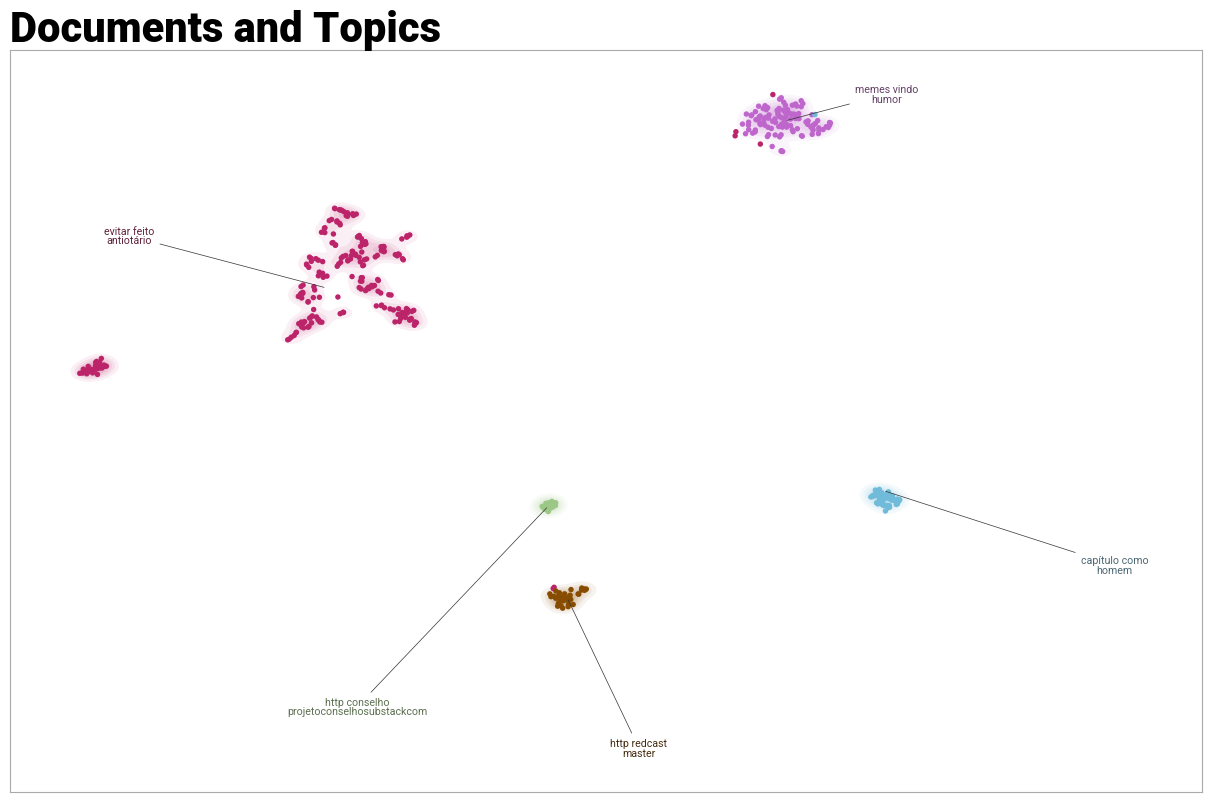

In [18]:
# Visualizar o documento de mapa com a visualização do BERTopic
document_datamap = topic_model.visualize_document_datamap(sentences)

In [22]:
df['published_at'] = pd.to_datetime(df['published_at']).dt.tz_localize(None)

# Extrair apenas o DIA/MÊS/ANO (removendo horas, minutos, etc.)
df['date'] = df['published_at'].dt.date
# Garantir que as colunas 'date' estejam no tipo datetime.date
df['date'] = pd.to_datetime(df['date']).dt.date

timestamps = df['date'].to_list()

topics_over_time = topic_model.topics_over_time(sentences, timestamps=timestamps)

v_topics_over_time = topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=6)
v_topics_over_time

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hoverinfo': 'text',
              'hovertext': [<b>Topic 0</b><br>Words: evitar, feito, antiotário,
                            ser, redpillbrasil, <b>Topic 0</b><br>Words: evitar,
                            se, feito, antiotário, que, <b>Topic 0</b><br>Words:
                            evitar, feito, ser, antiotário, redpillbrasil, <b>Topic
                            0</b><br>Words: evitar, antiotário, ser, feito, curso,
                            <b>Topic 0</b><br>Words: evitar, feito, antiotário,
                            ser, redpillbrasil, <b>Topic 0</b><br>Words: curso,
                            evitar, antiotário, feito, ser, <b>Topic
                            0</b><br>Words: evitar, feito, antiotário, ser, se,
                            <b>Topic 0</b><br>Words: evitar, antiotário, feito,
                            que, curso, <b>Topic 0</b><br>Words: evitar, ser,
                            feito, antiotário, redpillbrasil, <b>Topic
                            0</b><br>Words: evitar, feito, ser, antiotário,
                            redpillbrasil, <b>Topic 0</b><br>Words: evitar, feito,
                            antiotário, ser, se, <b>Topic 0</b><br>Words: evitar,
                            ser, antiotário, feito, redpillbrasil, <b>Topic
                            0</b><br>Words: evitar, feito, antiotário, ser,
                            redpillbrasil, <b>Topic 0</b><br>Words: evitar, ser,
                            feito, antiotário, redpillbrasil, <b>Topic
                            0</b><br>Words: curso, evitar, antiotário, feito, ser,
                            <b>Topic 0</b><br>Words: evitar, feito, antiotário,
                            ser, redpillbrasil, <b>Topic 0</b><br>Words: feito,
                            evitar, que, redpillbrasil, antiotário, <b>Topic
                            0</b><br>Words: evitar, feito, ser, antiotário,
                            redpillbrasil, <b>Topic 0</b><br>Words: evitar, feito,
                            redpillbrasil, antiotário, ser, <b>Topic
                            0</b><br>Words: evitar, feito, ser, antiotário,
                            redpillbrasil, <b>Topic 0</b><br>Words: evitar, feito,
                            antiotário, ser, redpillbrasil, <b>Topic
                            0</b><br>Words: evitar, feito, antiotário, ser,
                            redpillbrasil, <b>Topic 0</b><br>Words: evitar,
                            redpillbrasil, feito, antiotário, ser, <b>Topic
                            0</b><br>Words: evitar, feito, antiotário, ser,
                            redpillbrasil, <b>Topic 0</b><br>Words: curso, evitar,
                            antiotário, feito, ser, <b>Topic 0</b><br>Words:
                            evitar, feito, antiotário, ser, redpillbrasil, <b>Topic
                            0</b><br>Words: evitar, feito, ser, antiotário,
                            ciladas, <b>Topic 0</b><br>Words: evitar, feito,
                            antiotário, ser, redpillbrasil, <b>Topic
                            0</b><br>Words: curso, evitar, antiotário, feito, ser,
                            <b>Topic 0</b><br>Words: evitar, feito, antiotário,
                            ser, se],
              'marker': {'color': '#E69F00'},
              'mode': 'lines',
              'name': '0_evitar_feito_antiotário_ser',
              'type': 'scatter',
              'x': array([datetime.date(2025, 5, 1), datetime.date(2025, 5, 2),
                          datetime.date(2025, 5, 3), datetime.date(2025, 5, 4),
                          datetime.date(2025, 5, 5), datetime.date(2025, 5, 6),
                          datetime.date(2025, 5, 7), datetime.date(2025, 5, 8),
                          datetime.date(2025, 5, 9), datetime.date(2025, 5, 10),
                          datetime.date(2025, 5, 11), datetime.date(2025, 5, 12),
                          datetime.date(2025, 5, 13), datetime.date(2

In [23]:
sources = df['channel_id'].tolist()  # Corrigir para pegar cada classe
topics_per_class = topic_model.topics_per_class(sentences, classes=sources)

# Visualizar os tópicos por classe
v_topics_per_class = topic_model.visualize_topics_per_class(topics_per_class, top_n_topics=10)
v_topics_per_class

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hoverinfo': 'text',
              'hovertext': [<b>Topic 0</b><br>Words: curso, que, antiotário, se,
                            cursos, <b>Topic 0</b><br>Words: ele, sinai, que, você,
                            feito, <b>Topic 0</b><br>Words: que, evitar, se, feito,
                            ser, <b>Topic 0</b><br>Words: http, masculinidade,
                            conselho, plaiter, somente, <b>Topic 0</b><br>Words:
                            lady, gaga, http, redcast, master, <b>Topic
                            0</b><br>Words: sigma, msol, traremos, curtir,
                            participação, <b>Topic 0</b><br>Words: evitar, feito,
                            ser, antiotário, redpillbrasil],
              'marker': {'color': '#E69F00'},
              'name': '0_evitar_feito_antiotário_ser',
              'orientation': 'h',
              'type': 'bar',
              'visible': True,
              'x': {'bdata': 'IAABAA0AAQADAAMAsAA=', 'dtype': 'i2'},
              'y': array(['UCNiU1wZxK6YN-KuJP7QMpBQ', 'UCO9FRrBUwGdYopkMbGGKbpg',
                          'UC3nQ4xUl6rodOWuQbBULyow', 'UCX0VSzJ2z5l0C9wnwh5SoRw',
                          'UCeL1a4rpEA8UG9IQIewPccg', 'UCExFA9MsrRmWnXUlhiwu4qA',
                          'UCAYoI16-UkXemcnhC-kTvDQ'], dtype=object)},
             {'hoverinfo': 'text',
              'hovertext': [<b>Topic 1</b><br>Words: memes, vindo, humor, video,
                            vamos, <b>Topic 1</b><br>Words: não, que, canal, memes,
                            vindo, <b>Topic 1</b><br>Words: memes, vindo, humor,
                            canal, não],
              'marker': {'color': '#56B4E9'},
              'name': '1_memes_vindo_humor_canal',
              'orientation': 'h',
              'type': 'bar',
              'visible': 'legendonly',
              'x': {'bdata': 'RQUn', 'dtype': 'i1'},
              'y': array(['UCRmNflJuD1TxLbRlDV08_7g', 'UC3nQ4xUl6rodOWuQbBULyow',
                          'UCUBeVY6Kn7ulBmUGynJqISw'], dtype=object)},
             {'hoverinfo': 'text',
              'hovertext': [<b>Topic 2</b><br>Words: capítulo, como, homem, ele,
                            emocional, <b>Topic 2</b><br>Words: jumbo, pronuncia,
                            miguel, kobeplusjumboredcast, brigaram],
              'marker': {'color': '#009E73'},
              'name': '2_capítulo_como_homem_ele',
              'orientation': 'h',
              'type': 'bar',
              'visible': 'legendonly',
              'x': {'bdata': 'LQE=', 'dtype': 'i1'},
              'y': array(['UCO9FRrBUwGdYopkMbGGKbpg', 'UCeL1a4rpEA8UG9IQIewPccg'], dtype=object)},
             {'hoverinfo': 'text',
              'hovertext': [<b>Topic 3</b><br>Words: http, redcast, master,
                            junior, instagram],
              'marker': {'color': '#F0E442'},
              'name': '3_http_redcast_master_junior',
              'orientation': 'h',
              'type': 'bar',
              'visible': 'legendonly',
              'x': {'bdata': 'JQ==', 'dtype': 'i1'},
              'y': array(['UCeL1a4rpEA8UG9IQIewPccg'], dtype=object)},
             {'hoverinfo': 'text',
              'hovertext': [<b>Topic 4</b><br>Words: http, conselho,
                            projetoconselhosubstackcom, bitlyqzcjp,
                            wwwgsuplementoscombr],
              'marker': {'color': '#D55E00'},
              'name': '4_http_conselho_projetoconselhosubstackc...',
              'orientation': 'h',
              'type': 'bar',
              'visible': 'legendonly',
              'x': {'bdata': 'Fg==', 'dtype': 'i1'},
              'y': array(['UCX0VSzJ2z5l0C9wnwh5SoRw'], dtype=object)}],
    'layout': {'height': 900,
               'hoverlabel': {'bgcolor': 'white', 'font': {'family': 'Rockwell', 'size': 16}},
               'legend': {'title': {'text': '<b>Global Topic Representation'}},
               'template': '...',
               'title': {'font': {'color':

Abaixo, as figuras serão salvas para possibilitar análises posteriores.

In [24]:
from utils.save_models_and_variables import save_fig

save_fig(barchart, f"{results_folder}/barchart.png")
save_fig(topics, f"{results_folder}/topics.png")
save_fig(heatmap, f"{results_folder}/heatmap.png")
save_fig(v_topics_per_class, f"{results_folder}/topics_per_class.png")
save_fig(documents, f"{results_folder}/documents.png")
save_fig(term_rank, f"{results_folder}/term_rank.png")
save_fig(hierarchy, f"{results_folder}/hierarchical_topics.png")
save_fig(document_datamap, f"{results_folder}/document_datamap.png")
save_fig(v_topics_over_time, f"{results_folder}/topics_over_time.png")

Não foi possível salvar 'results_2025_06_10/barchart.png'
Não foi possível salvar 'results_2025_06_10/topics.png'
Não foi possível salvar 'results_2025_06_10/heatmap.png'
Não foi possível salvar 'results_2025_06_10/topics_per_class.png'
Não foi possível salvar 'results_2025_06_10/documents.png'
Não foi possível salvar 'results_2025_06_10/term_rank.png'
Não foi possível salvar 'results_2025_06_10/hierarchical_topics.png'
Não foi possível salvar 'results_2025_06_10/document_datamap.png'
Não foi possível salvar 'results_2025_06_10/topics_over_time.png'
